# MOwNiT
### Transformata Fouriera

Korzystamy z pakietu FFTW
```julia
Pkg.add("FFTW")
```
Jest to Juliowy wrapper do biblioteki FFTW http://www.fftw.org/fftw3_doc/

### Przykład

In [8]:
import Pkg
Pkg.add("FFTW")
# produkcja sztucznego sygnału.
#Wybieram częstotliwość próbkowania
Fs = 1024;  

# generuje wektor punktów czasowych w przedziale [0 1] co 1/Fs
t = 0:1/(Fs-1):1; 

#Obliczam wartość sygnału (tutaj sinus o częstotliwości 200 Hz) 
x= cos.(2*pi*t*200)


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed oneTBB_jll ────── v2022.0.0+0
   Installed MKL_jll ───────── v2025.0.1+1
   Installed IntelOpenMP_jll ─ v2025.0.4+0
   Installed FFTW_jll ──────── v3.3.11+0
   Installed AbstractFFTs ──── v1.5.0
   Installed FFTW ──────────── v1.9.0
    Updating `~/.julia/environments/v1.11/Project.toml`
  [7a1cc6ca] + FFTW v1.9.0
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
  [7a1cc6ca] + FFTW v1.9.0
  [f5851436] + FFTW_jll v3.3.11+0
  [1d5cc7b8] + IntelOpenMP_jll v2025.0.4+0
  [856f044c] + MKL_jll v2025.0.1+1
  [1317d2d5] + oneTBB_jll v2022.0.0+0
  [4af54fe1] + LazyArtifacts v1.11.0
Precompiling project...
    543.1 ms  ✓ AbstractFFTs
    443.1 ms  ✓ FFTW_jll
    447.9 ms  ✓ oneTBB_jll
    622.0 ms  ✓ IntelOpenMP_jll
    608.6 ms  ✓ AbstractFFTs → AbstractFFTsChainRulesCoreExt
    655.8 ms  ✓ MKL_jll
   1066.6 ms  ✓ AbstractFFTs → AbstractFFTsTestExt

1024-element Vector{Float64}:
  1.0
  0.3357601406844006
 -0.7745302558551831
 -0.8558729160249227
  0.19979423447019068
  0.9900387965722093
  0.4650368967700086
 -0.6777570888063393
 -0.920164527744941
  0.05984794622946579
  0.9603536374362968
  0.5850489985953087
 -0.5674813692850407
  ⋮
  0.5850489985953179
  0.9603536374362935
  0.059847946229454406
 -0.9201645277449454
 -0.6777570888063309
  0.4650368967700179
  0.990038796572208
  0.19979423447018124
 -0.8558729160249274
 -0.7745302558551775
  0.3357601406844084
  1.0

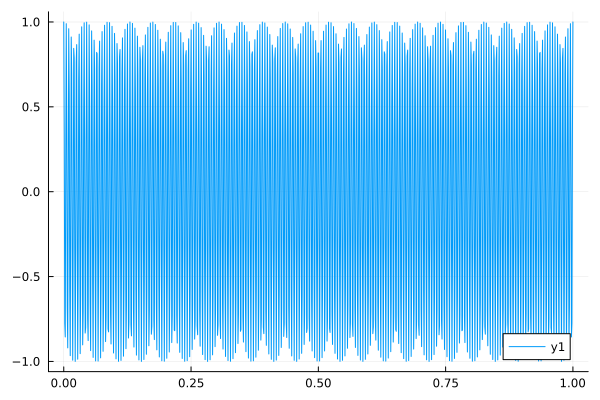

In [9]:
using Plots
plot(t,x)

In [10]:
using Pkg
#Pkg.add("FFTW")
using FFTW
#Dokonuję transformaty Fouriera
y=fft(x)


1024-element Vector{ComplexF64}:
 1.0000000000001799 + 0.0im
 1.0000189284184202 + 0.00306802927341596im
 1.0000757193983043 + 0.006136464772091954im
 1.0001703901197923 + 0.00920571292306216im
 1.0003029692303058 + 0.012276180557806327im
 1.0004734968662823 + 0.015348275114625998im
 1.0006820246828725 + 0.01842240484069191im
 1.0009286158930222 + 0.021498978997254392im
 1.0012133453160166 + 0.02457840806464784im
 1.0015362994320585 + 0.027661103948183996im
 1.0018975764484286 + 0.0307474801868326im
 1.0022972863739752 + 0.03383795216151936im
 1.0027355511006713 + 0.03693293730793995im
                    ⋮
 1.0027355511006726 - 0.03693293730794034im
 1.0022972863739756 - 0.033837952161519524im
 1.0018975764484321 - 0.030747480186831933im
  1.001536299432063 - 0.027661103948183552im
 1.0012133453160175 - 0.024578408064662938im
  1.000928615893021 - 0.02149897899724973im
  1.000682024682873 - 0.018422404840692685im
  1.000473496866281 - 0.015348275114626109im
 1.0003029692303058 - 0.012

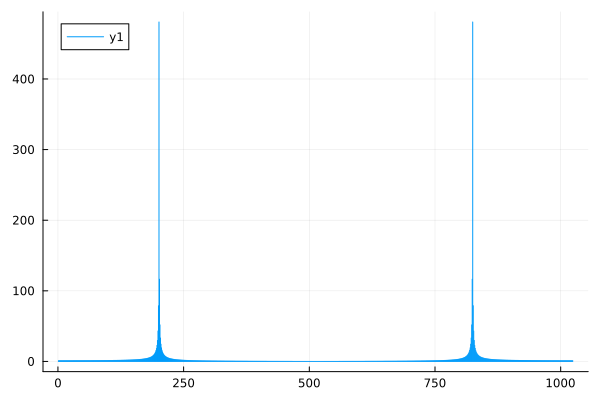

In [11]:
# wykres słupkowy transformaty (moduł z liczb zespolonych).
# symetryczny
# widoczna wysoka amplituda dla częstotliwości sygnału (tutaj 200) oraz symetrycznego odbicia tej 
# częstotliwości  
sticks((abs.(fft(x))))

In [12]:
? fft

search: fft ifft bfft fft! rfft brfft irfft ifft! bfft! font



```
fft(A [, dims])
```

Performs a multidimensional FFT of the array `A`. The optional `dims` argument specifies an iterable subset of dimensions (e.g. an integer, range, tuple, or array) to transform along. Most efficient if the size of `A` along the transformed dimensions is a product of small primes; see `Base.nextprod`. See also [`plan_fft()`](@ref) for even greater efficiency.

A one-dimensional FFT computes the one-dimensional discrete Fourier transform (DFT) as defined by

$$
\operatorname{DFT}(A)[k] =
  \sum_{n=1}^{\operatorname{length}(A)}
  \exp\left(-i\frac{2\pi
  (n-1)(k-1)}{\operatorname{length}(A)} \right) A[n].
$$

A multidimensional FFT simply performs this operation along each transformed dimension of `A`.

!!! note
    This performs a multidimensional FFT by default. FFT libraries in other languages such as Python and Octave perform a one-dimensional FFT along the first non-singleton dimension of the array. This is worth noting while performing comparisons.



Zadania:
1. Zamień sygnał na sumę sygnałów <b>(1 pkt)</b> np
```julia
x = sin.(2*pi*t*200) + 2* sin.(2*pi*t*400) 
```

  Zaobserwuj wynik transformaty i wyjaśnij go.
<p> 
2.  Usuwanie szumów <b>(1 pkt)</b> :

    1. Wypełniamy tablicę wartościami funkcji cosinus ("sygnału") zaburzonej niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją rand().
    2. Proszę narysować wykres zaszumionej funkcji.
    3. Narysować wykres transformaty Fouriera (widmo)  tego sygnału (jak poprzednio).
    4. Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału.
    5.Przeprowadzić odwrotną transformatę funkcją ifft(). Narysować wykres otrzymanej funkcji dla częsci  rzeczywistej. Porównać z wejściowym wykresem sygnału.
<p>
3. Proszę nagrać własny glos i zastosować na nim trasformatę Fouriera, narysować wykres widma (uwaga: przy rysowaniu należy przetworzyć możliwie małą próbkę ze względu na problemy z rysowaniem wykresów w Jupyterze dla dużych danych). Następnie poeksperymentować (wyciąć wybrane częstotliwości), dokonać odwrotnej transformaty i odsłuchać efekt (3 pkt) .
<p>
Przydatne materiały:
     1. <a href="http://samcarcagno.altervista.org/blog/basic-sound-processing-julia/"> Basic sound processing</a>
     2. <a href="https://github.com/dancasimiro/WAV.jl"> Pakiet Wav </a>

In [13]:
using Pkg
Pkg.add(["Plots", "FFTW", "WAV", "Random"])

   Resolving package versions...
   Installed FileIO ─ v1.17.0
   Installed WAV ──── v1.2.0
    Updating `~/.julia/environments/v1.11/Project.toml`
  [8149f6b0] + WAV v1.2.0
  [9a3f8284] + Random v1.11.0
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [5789e2e9] + FileIO v1.17.0
  [8149f6b0] + WAV v1.2.0
Precompiling project...
   1831.7 ms  ✓ FileIO
    945.3 ms  ✓ WAV
   1362.8 ms  ✓ FileIO → HTTPExt
   2223.0 ms  ✓ Plots → FileIOExt
  4 dependencies successfully precompiled in 4 seconds. 355 already precompiled.


## Zadanie 1

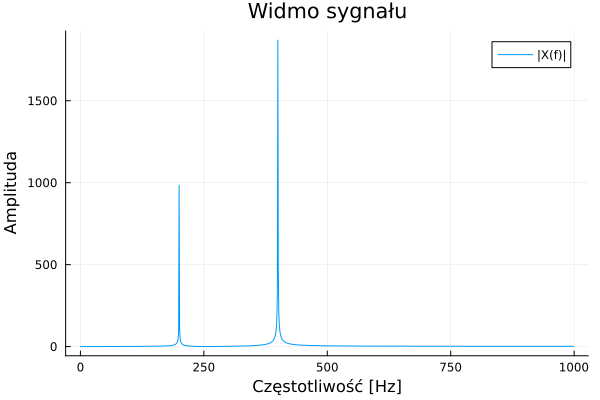

In [15]:
using Plots, FFTW

fs = 2000  # Częstotliwość próbkowania
t = 0:1/fs:1  # Czas 0-1s z krokiem 1/fs

# Sygnał złożony z dwóch sinusów
x = sin.(2π*200 .* t) .+ 2 * sin.(2π*400 .* t)

# Wykres sygnału
plot(t[1:300], x[1:300], label="Sygnał złożony", xlabel="Czas [s]", ylabel="Amplituda", title="Sygnał: sin(200Hz) + 2*sin(400Hz)")

# Transformata Fouriera
X = fft(x)
freq = (0:length(X)-1) * fs / length(X)

# Wykres widma
plot(freq[1:1000], abs.(X[1:1000]), xlabel="Częstotliwość [Hz]", ylabel="Amplituda", title="Widmo sygnału", label="|X(f)|")


## Zadanie 2

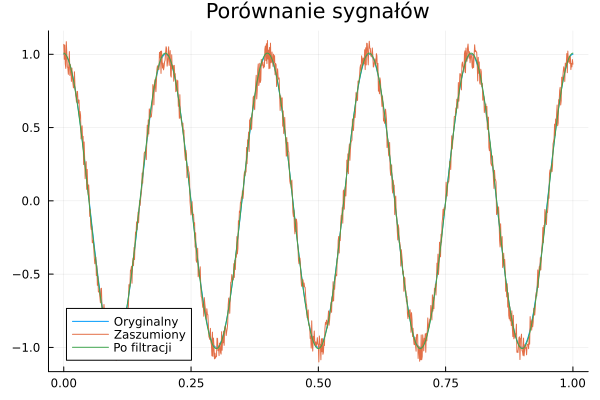

In [17]:
using Random

# Sygnał z szumem
t = 0:0.001:1
clean_signal = cos.(2π*5 .* t)
noise = rand(length(t)) .- 0.5  # Szum [-0.5, 0.5]
noisy_signal = clean_signal .+ 0.2 .* noise

# Wykres zaszumionego sygnału
plot(t, noisy_signal, label="Zaszumiony sygnał", title="Zaszumiony cosinus")

# Transformata Fouriera
Y = fft(noisy_signal)

# Wykres widma
plot(abs.(Y), label="Widmo", title="Widmo zaszumionego sygnału")

# Filtracja - usunięcie małych wartości
Y_filtered = copy(Y)
Y_filtered[abs.(Y) .< 50] .= 0

# Odwrotna transformata
filtered_signal = real(ifft(Y_filtered))

# Porównanie sygnałów
plot(t, [clean_signal noisy_signal filtered_signal], label=["Oryginalny" "Zaszumiony" "Po filtracji"], title="Porównanie sygnałów")


## Zadanie 3

In [20]:
using WAV, FFTW, Plots

# Wczytaj plik (mono lub stereo)
filename = "moj_glos.wav"  # Podmień
y, fs = wavread(filename)

# Wybierz jeden kanał jeśli stereo
if ndims(y) == 2 && size(y, 2) > 1
    y = y[:, 1]
end

# Weź próbkę 4096 próbek
segment = y[1:4096]

# FFT
Y = fft(segment)

# Modyfikacja widma – np. wycięcie pasma 200–1000
Y_filtered = copy(Y)
Y_filtered[200:1000] .= 0
Y_filtered[end-1000:end-200] .= 0

# Odwrotna FFT
y_mod = real(ifft(Y_filtered))

# Normalizacja amplitudy, żeby nie było przesterowania
y_mod ./= maximum(abs.(y_mod))  # skala [-1, 1]

# Konwersja do Float32, bo WAV.jl tego oczekuje
y_mod32 = convert(Vector{Float32}, y_mod)

# Zapis jako mono plik WAV
wavwrite(y_mod32, fs, "zmodyfikowany_plik.wav")

